___
# Projeto 2 - Ciência dos Dados 2020.2
Grupo: Raphael Lahiry de Barros, Rodrigo Coelho, Paulo Kim, Florencia Averame
___

## Objetivo do projeto:

- A partir de diversas características sociais, pessoais e acadêmicas de um aluno, é possível prever a nota final dele?  
- O nosso target é quantitativo, já que queremos prever uma informação numérica. 

In [62]:
# Importanto bibliotecas 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from math import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = None
%matplotlib inline

In [63]:
# Abrindo o dataset e transformando em dataframes
data_mat = pd.read_csv('archive/student-mat.csv')
data_por = pd.read_csv('archive/student-por.csv')

## Descrição do dataset
- As informações do dataset foram obtidas a partir de um questionário feito com estudantes matriculados nos cursos de matemática e português do ensino médio.   
- A base de dados contém diversas informações pessoais, sobre a vida social, sobre a vida acadêmica, sobre a familia, sobre as relações interfamiliares, amorosas, amigáveis, etc.

## Fonte de informações

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

## Índice do Dataset
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' (0) - less or equal to 3 or 'GT3' (1) - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)  
  
   
   
- These grades are related with the course subject, Math or Portuguese:

    - G1: first period grade (numeric: from 0 to 20)  
    - G2: second period grade (numeric: from 0 to 20)  
    - G3: final grade (numeric: from 0 to 20, output target)  

## Observações sobre o desenvolvimento do projeto:
O segundo projeto para a disciplina de Ciência dos Dados, foi desenvolvido conjuntamente e igualmente pelos quatro membros do grupo. O desenvolvimento se deu por meio de chamadas via Microsoft Teams, onde a tela era espelhada para todos do grupo poderem desenvolver o projeto conjuntamente. 

  
## Simplicações:
Para a realização do projeto, adotamos a simplificação de que a nota do aluno não depende da disciplina que ele está fazendo. Dessa forma, juntamos o dataFrame de português com o de matemática e realizaremos o nosso teste de hipótese sobre este novo dataFrame. Ademais, a nota G3 é composta pelas notas G1 e G2 e assim, é a nota final do curso. Por isso, utilizaremos o nosso modelo para prever apenas essa a nota final (G3).


## Nossas variáveis na estatística
 - A nossa variável principal é a G3, desta forma, ela recebe o nome de target
 - As demais variáveis que não são a G3 recebem o nome de feature

___
# Conhecendo os dados:

In [64]:
# Visualizando os dados dos alunos na matéria de matemática
data_mat['subject'] = 1
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


In [65]:
# Visualizando os dados dos alunos na matéria de português
data_por['subject']=0
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,0


*Juntaremos os dataframes, já que não não há a necessidade da separação de matérias para o nosso modelo de predição*

In [66]:
# Juntando os dataframes
data = pd.concat([data_mat,data_por],ignore_index=True)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


*Realizaremos uma análise superficial dos tipos de dados e possíveis nulls*

In [67]:
# Análise superficial dos tipos de dados e possíveis nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [68]:
# Análise superficial dos possíveis nulls
sum(data.isnull().sum())

0

*Separaremos as features em numéricas e categóricas*

In [69]:
# Identificando features numéricas
num_data = data.select_dtypes(include=[np.number]).columns
num_data

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'subject'],
      dtype='object')

In [70]:
# Identificando features categóricas
cat_data = data.select_dtypes(exclude=[np.number]).columns
cat_data

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


*Devido ao fato de algumas features apresentarem dados categóricos em forma de números, transformaremos-as em categorias:*


In [71]:
# Identificando variáveis númericas que na verdade são categóricas
num_to_cat = ['Medu','Fedu','famrel','freetime','goout','freetime','Dalc','Walc','health','subject']

for column in num_to_cat:
    data[column] = data[column].astype('category')

for column in cat_data:
    data[column] = data[column].astype('category')

In [72]:
# Associando novamente os tipos de variáveis 
num_data = data.select_dtypes(include=[np.number]).columns
cat_data = data.select_dtypes(exclude=[np.number]).columns

print('VARIÁVEIS NÚMERICAS:')
print('')
print(num_data)
print('')
print('='*80)
print('')
print('VARIÁVEIS CATEGÓRICAS:')
print('')
print(cat_data)

VARIÁVEIS NÚMERICAS:

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


VARIÁVEIS CATEGÓRICAS:

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'subject'],
      dtype='object')


___
# Análise Exploratória


## Análise numérica

*Através da análise numérica analisaremos as variáveis numéricas*

In [25]:
# Para termos um panorama dos nossos dados, utilizaremos o .describe()
data.describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,0.264368,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.731727,0.834353,0.656142,6.210017,2.983394,3.285071,3.864796
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


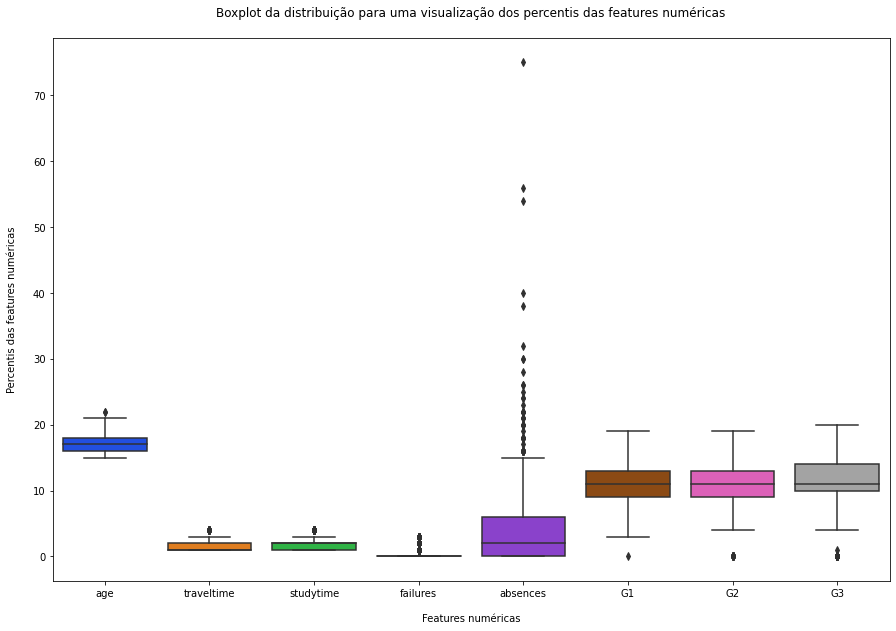

In [75]:
# Plotando o boxplot para uma visualização dos percentis das features numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.loc[:,num_data], palette='bright')
plt.title('Boxplot da distribuição para uma visualização dos percentis das features numéricas\n')
plt.xlabel('\nFeatures numéricas')
plt.ylabel('Percentis das features numéricas\n')
plt.show()

#### Observações do Boxplot
* Podemos observar que numero de faltas possui muitos outliers, e isto poderia ser explicado pois o número de faltas não deveria ter um padrão, possuindo um desvio padrão alto. 
* Também podemos notar que as notas seguem uma distribuição parecida pelo fato dos alunos tenderem a manter um desempenho parecido nas avaliações ou melhorar com o passar do tempo.

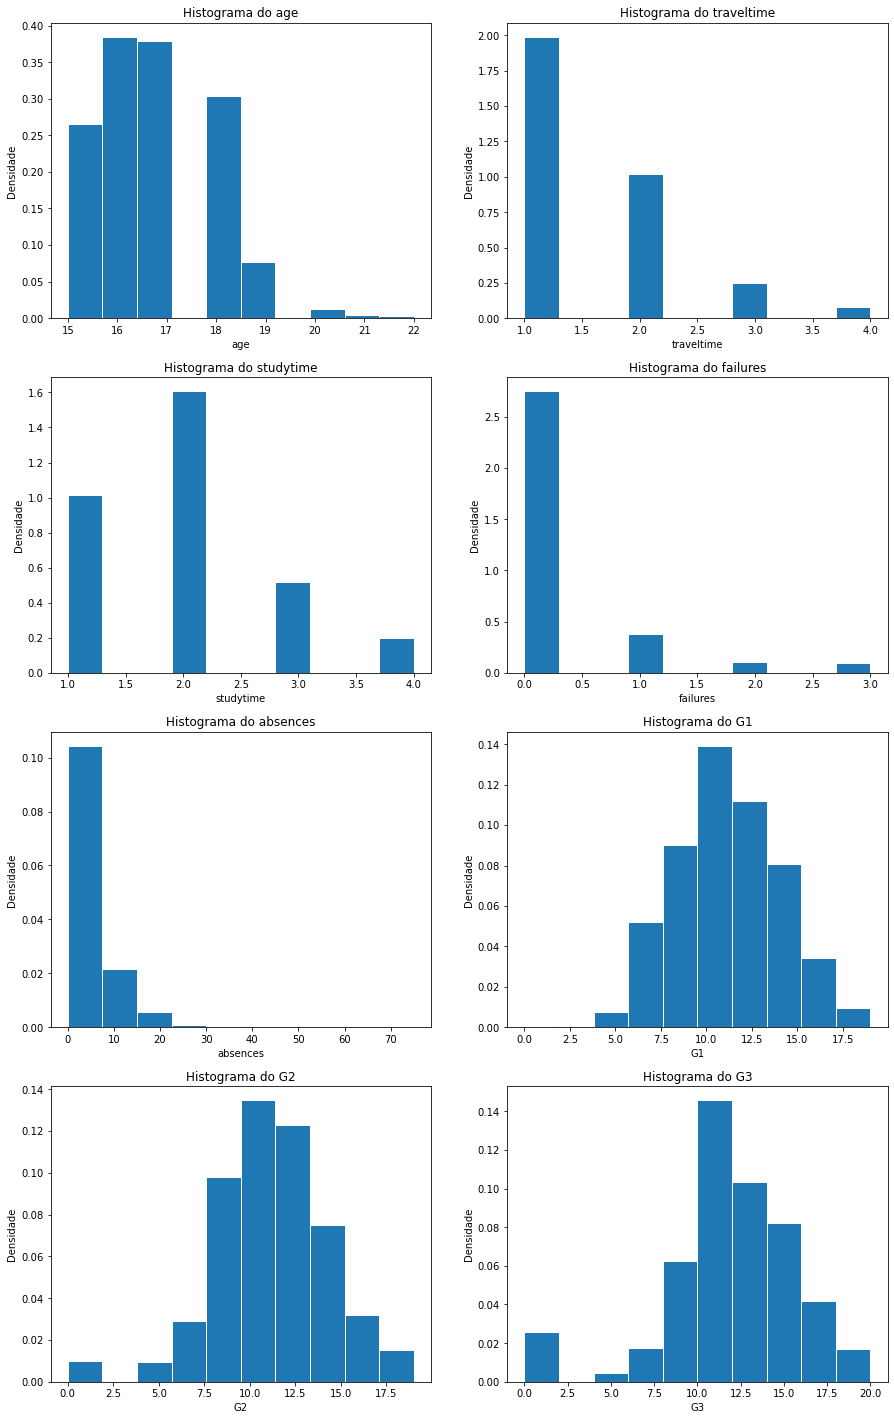

In [84]:
# Para observarmos o comportamento dos dados de maneira visual, plotaremos histogramas de cada feature
plt.figure(figsize = (15,25))
for i in enumerate(num_data):
    plt.subplot(4,2,i[0]+1)
    plt.hist(data[i[1]], edgecolor = 'white', density = True)
    plt.title(f'Histograma do {i[1]}')
    plt.xlabel(i[1])
    plt.ylabel('Densidade')

#### Observação do histograma de cada feature
* Podemos observar que as notas de cada período aparentam apresentar uma distruibuição normal

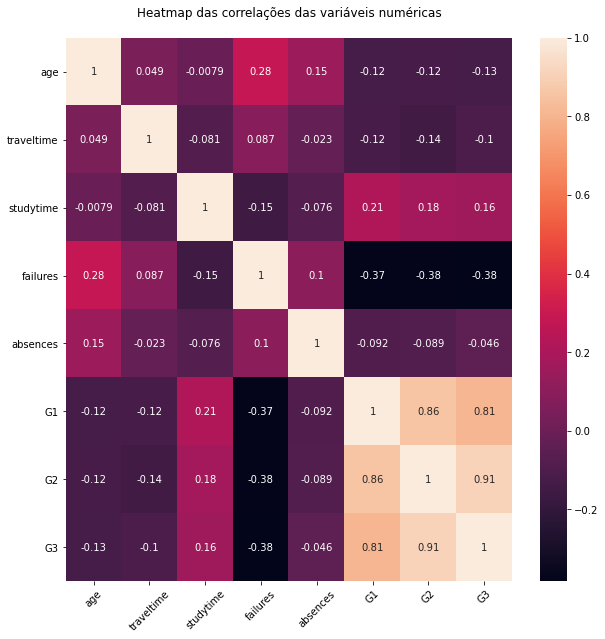

In [86]:
# Calcularemos as correlações das variáveis númericas. Utilizaremos um heatmap para podermos ter uma visualização melhor
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap das correlações das variáveis numéricas\n')
plt.show()

___
## Análise categórica

*Através da análise categórica analisaremos as variáveis categóricas*

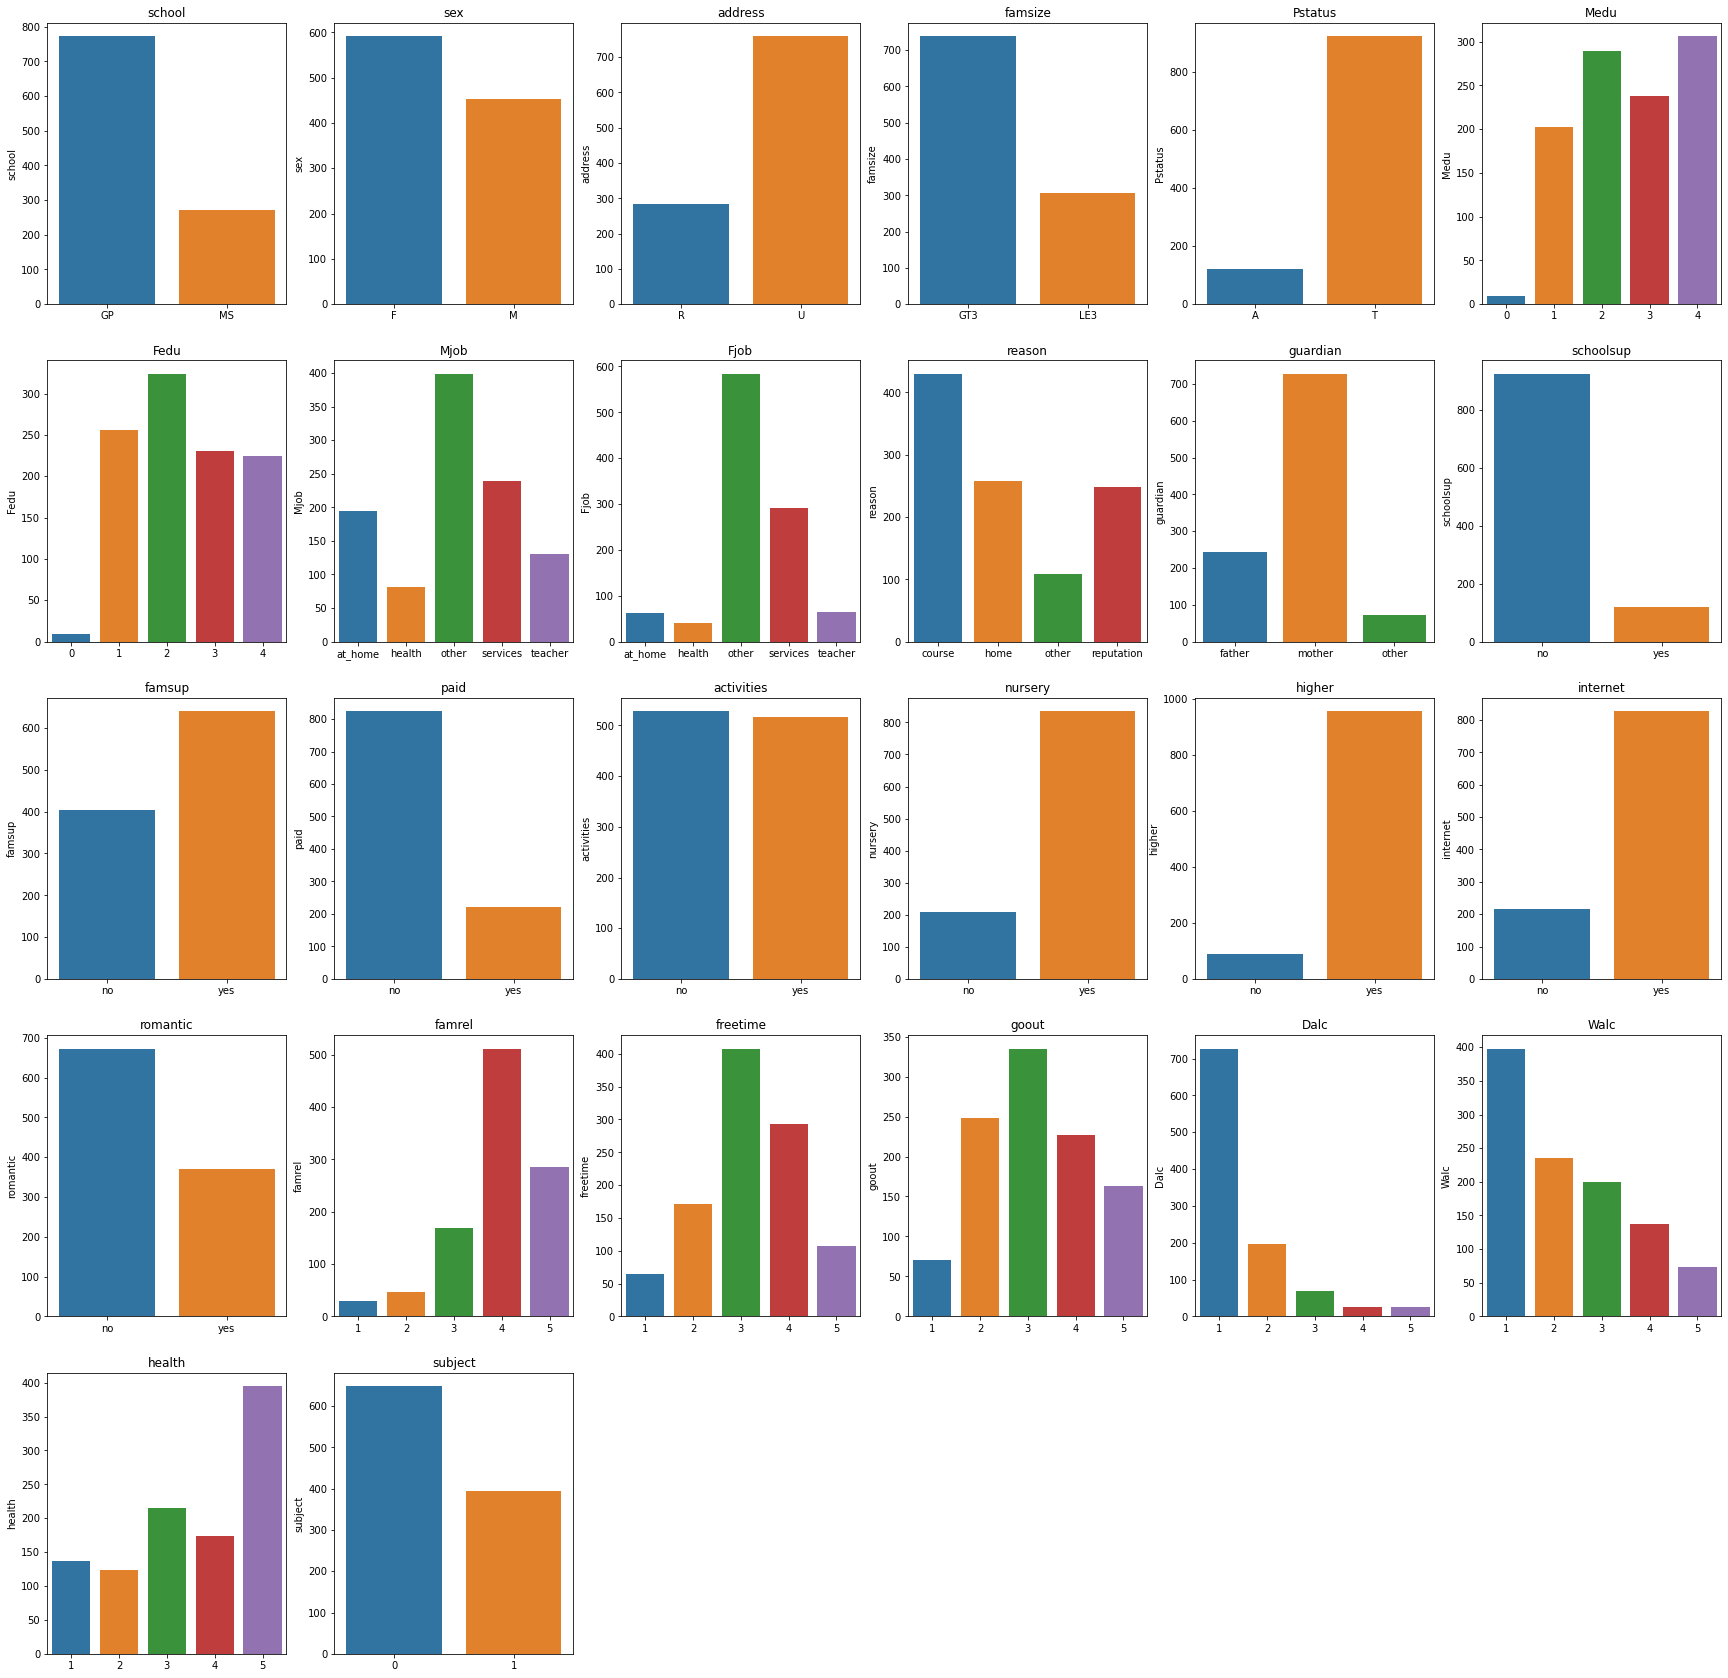

In [95]:
# utilizaremos os gráficos de barra para podermos ter visão clara das features
plt.figure(figsize = (30,30))
for i in enumerate(cat_data):
    plt.subplot(5,6,i[0]+1)
    sns.barplot(data[i[1]].value_counts().index, data[i[1]].value_counts()).set_title(i[1])

In [98]:
# Realizaremos um primeiro groupby para analisar a relação entre o 
# consumo diário de álcool e o desempenho do aluno nas avaliações
data.groupby(by = 'Dalc')['G1', 'G2','G3'].mean()

,G1,G2,G3
Dalc,,,
1,11.492435,11.536451,11.704264
2,10.790816,10.719388,10.556122
3,10.492754,10.666667,10.898551
4,9.884615,9.576923,9.269231
5,9.846154,10.307692,10.384615


#### Observação do primeiro groupby
* Observando a tabela acima, observamos que o consumo diário de álcool afeta negativamente o desempenho do aluno.

In [101]:
# Realizaremos um segundo groupby para analisar a relação entre o 
# consumo seamanal de álcool e o desempenho do aluno nas avaliações
data.groupby(by = 'Walc')['G1', 'G2','G3'].mean()

,G1,G2,G3
Walc,,,
1,11.494975,11.610553,11.743719
2,11.574468,11.382979,11.472340
3,11.160000,11.265000,11.290000
4,10.405797,10.376812,10.536232
5,10.191781,10.410959,10.397260


#### Observação do segundo groupby
* Observando a tabela acima, observamos que o consumo de álcool nos finais de afeta negativamente o desempenho do aluno.

___
# Modelos 


A partir daqui inicia-se a construção dos modelos de predição

In [32]:
# Preparando o dataset para a implementação da regressão
drop_list = ['famrel', 'goout','Dalc', 'Walc', 'freetime', 'health', 'age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2','G3', 'Fedu', 'Medu']
colunas = list(data.columns)

for i in drop_list:
    colunas.remove(i)
    
data = pd.get_dummies(data, columns = colunas)
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_0,subject_1
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
1040,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0
1041,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0
1042,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0


In [33]:
# Dado que o nosso target é apenas a nota final 'G3', desconsideramos 'G1' e 'G2' para a construção do modelo de regressão
data.drop('G1', axis=1, inplace=True)
data.drop('G2', axis=1, inplace=True)
data.rename(columns={'G3':'finalG'}, inplace=True)

data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,finalG,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_0,subject_1
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1


# Modelos preditivos
Para realizar as predições, decidimos utilizar a regressão, o que nada mais é que um método que tem como objetivo determinar quais variáveis independentes  possuem um impacto em uma variável dependente. Nesse projeto, nos interessamos em 3 tipos de regressão:
* Lasso (Least Absolute Shrinkage and Selection Operator)
* Elastic Net
* Random Forest Regression    

## Modelo 1: Lasso
A regressão de Lasso é um tipo de regressão linear, onde o método de shrinkage é utilizado. O shrinkage é basicamente uma função que faz com que os dados tendem a um ponto central. A partir daí, uma penalidade é atribuída à magnitude dos coeficientes. Assim, valores podem tender a zero ou até eliminados. Optamos esse modelo como a primeira opção devido a simplicidade da regressão linear e pelos interessantes insights que podemos ter a partir de seus coeficientes penalizados.

In [34]:
# Importando as bibiliotecas necessárias
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
# Definindo nossa coluna de interesse "finalG" e separando ela do DF a ser analisado pelo modelo
labels = np.array(data['finalG'])
data = data.drop('finalG', axis = 1)

# Fazendo uma lista com as colunas do DF
data_list = list(data.columns)

Aqui separaremos os dados de treino e teste, para assim, podermos treinar o nosso modelo:

In [36]:
# Separando os dados de teste e treino em 70% e 30%, respectivamente
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3, random_state = 42)

In [37]:
# Treinando o nosso modelo e prevendo os valores
lrl = Lasso(alpha=0.001)
lrl.fit(train_data, train_labels)

# Previsões do nosso modelo
predictions_lrl = lrl.predict(test_data)

In [105]:
# Loop onde podemos observar a relação de cada coluna com a coluna de interesse

lista_coef = []

for nome, beta in zip(data.columns, lrl.coef_):
    lista_coef.append((nome, round(beta, 4)))
        
df_coef = pd.DataFrame(lista_coef, columns=['coluna dataset', 'coef'])

print('Tabela que compara a correlação de cada coluna com nosso Target')
df_coef.T

Tabela que compara a correlação de cada coluna com nosso Target


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
coluna dataset,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_0,subject_1
coef,-0.0165,0.1545,0.1385,0.0157,0.4805,-1.8562,0.1121,0.0659,-0.1344,-0.121,0.0409,-0.1682,-0.005,1.0951,-0,0.2575,-0,-0.4125,0,-0.5192,0,-0.425,0,-0.1911,1.084,-0,0.587,-0.1519,-0,-0.325,0.0745,-0.1324,0.9057,-0.0196,0.0007,-0.3884,0.1845,0,-0.0875,1.3877,1.4271,-0,0.4736,-0,-0.3704,0,-0.0357,0,0.2525,-0,-1.9921,0,0.0642,-0,0.5105,-0,2.0209,-0


*Nas seguintes células analisaremos as associações das nossas features com a nossa target*

Com os nossos dados previstos, calcularemos a nossa taxa de acurácia com a base de teste

In [42]:
# Aqui estamos achando o erro quadrático médio entre nossas previsões e valores reais
rmse_lrl = np.sqrt(mean_squared_error(test_labels, predictions_lrl))
rmse_lrl = round(rmse_lrl,3)

print(f'Nosso erro quadrático médio foi de: {rmse_lrl} pontos')

Nosso erro quadrático médio foi de: 3.584 pontos


In [43]:
# Encontrando os resíduos do nosso modelo
residuos_lrl = test_labels - predictions_lrl

# Visualizando estatisticamente nossos resíduos
pd.Series(residuos_lrl).describe()

count    314.000000
mean       0.022959
std        3.589440
min      -14.368621
25%       -1.528166
50%        0.212074
75%        2.061836
max        8.542050
dtype: float64

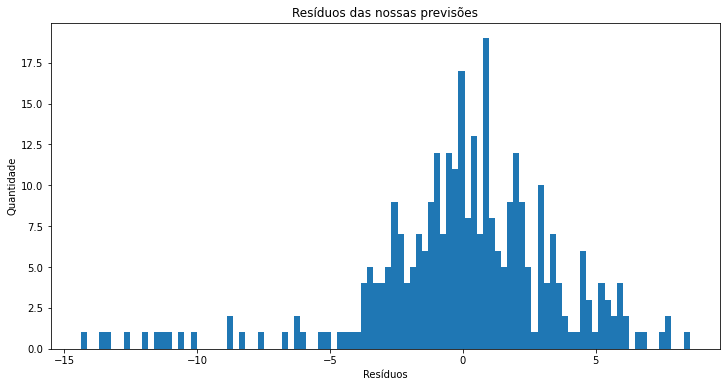

In [44]:
plt.figure(figsize=(12,6))
plt.hist(residuos_lrl, bins=100)
plt.title('Resíduos das nossas previsões')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

*Aqui encontraremos o número de outliers*

In [45]:
# Aqui vamos considerar como outlier todos aqueles fora do intervalo de -5 a 5

outliers_lrl = []

for valor in residuos_lrl:
    if valor > 5 or valor < -5:
        outliers_lrl.append(round(valor,3))
        
print(f'Usando o modelo Lasso, obtivemos {len(outliers_lrl)} outliers.')

Usando o modelo Lasso, obtivemos 42 outliers.


## Conclusão do modelo Lasso

Nesse modelo pudemos observar um erro quadrático médio de aproximadaemnte 3.5 pontos e 42 outliers. Apesar dos valores não tão bons, encontramos uma histograma de erros relativamente bom, com muitos valores de resíduos orbitando ao redor do zero. Além disso, utilizando o método .coef do modelo Lasso, puder encontrar correlações positivas entre o Walc e o target (finalG) e correlações negativas entre o Dalc e o target (finalG)

## Modelo 2 - Elastic Net 
A regressão de Elastic Net é basicamente uma combinação do modelo Lasso com o de Rigde. O Lasso elimana features, possibilitanto uma redução de overfit, já o Ridge, reduz o impacto das features que não são importantes. A escolha desse modelo foi com o intuito de tentar obter uma melhor performance do que o Lasso.

In [102]:
# Importando bibliote do ElasticNet
from sklearn.linear_model import ElasticNet

# Criando modelo
en = ElasticNet(random_state=0)
en.fit(train_data, train_labels)

# Criando previsões
predictions_en = en.predict(test_data)

In [104]:
# Loop onde podemos observar a relação de cada coluna com a coluna de interesse

lista_coef = []

for nome, beta in zip(data.columns, en.coef_):
    lista_coef.append((nome, round(beta, 4)))
        
df_coef = pd.DataFrame(lista_coef, columns=['coluna dataset', 'coef'])

print('Tabela que compara a correlação de cada coluna com nosso Target')
df_coef.T

Tabela que compara a correlação de cada coluna com nosso Target


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
coluna dataset,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_0,subject_1
coef,-0,0.1589,0.0183,-0,0.0407,-0.5375,0,-0,-0,-0,-0,-0,-0.0155,0,-0,0,-0,-0,0,-0,0,-0,0,-0,0,-0,0,0,-0,0,-0,-0,0,-0,0,-0,0,0,-0,-0,0,-0,-0,0,0,-0,-0,0,-0,0,-0,0,-0,0,0,-0,0,-0


In [103]:
# Encontrando o erro quadrático médio do nosso modelo de Elastic Net 
rmse_en = np.sqrt(mean_squared_error(test_labels, predictions_en))
rmse_en = round(rmse_en,4)

print(f'Nosso erro quadrático médio foi de: {rmse_en} pontos')

Nosso erro quadrático médio foi de: 3.7154 pontos


In [104]:
# Encontrando os resíduos do nosso modelo
residuos_en = test_labels - predictions_en

# Vizualizando estatisticamente nossos resíduos
pd.Series(residuos_en).describe()

count    314.000000
mean      -0.072758
std        3.720605
min      -11.827363
25%       -1.686587
50%        0.036130
75%        2.379010
max        7.563922
dtype: float64

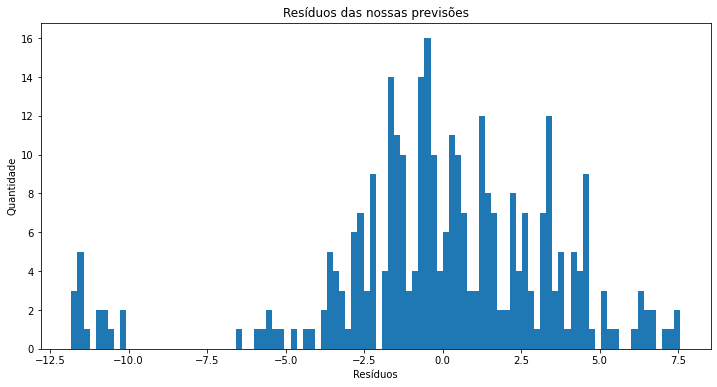

In [105]:
plt.figure(figsize=(12,6))
plt.hist(residuos_en, bins=100)
plt.title('Resíduos das nossas previsões')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

*Aqui encontraremos o número de outliers*

In [107]:
# Aqui vamos considerar como outlier todos aqueles fora do intervalo de -5 a 5

outliers_en = []

for valor in residuos_en:
    if valor > 5 or valor < -5:
        outliers_en.append(round(valor,3))
        
print(f'Usando o modelo Elastic Net, obtivemos {len(outliers_en)} outliers.')

Usando o modelo Elastic Net, obtivemos 40 outliers.


Podemos observar que o modelo de Elastic Net teve uma pior performance do que o Lasso. Isso pode ser devido ao fato das features não estarem altamente correlacionadas. 

## Conclusão do modelo Elastic NET

Nesse modelo pudemos observar um erro quadrático médio de aproximadaemnte 3.7 pontos e 40 outliers. Ao comparar esse modelo com o primeiro modelo utilizado (Lasso), pudemos observar uma piora no erro quadrático médio, mas uma melhora no número de outliers. O uso do método .coef no Elastic NET nos mostrou outros tipos de correlação. O .coef do Elastic NET utiliza uma combinação do modelo Rigde e do Lasso, porém conseguimos observar que nessa combinação chegamos em uma correlação de zero tanto entre Dalc e o target (finalG) como Walc e o target (finalG). Como com esse modelo perdemos muitas métricas, optamos por um tereiro modelo que nos entregasse mais resultados.

## Modelo 3 - Random Forest Regression

A Random Forest Regression tem como essência o uso de múltiplas árvores de decisão para a determinação do output final em vez de utilizar apenas uma árvore. A escolha desse modelo foi devido a sua popularidade e boa performance na acurácia.

In [90]:
# Importando bibliote do RandomForest
from sklearn.ensemble import RandomForestRegressor

# Criando modelo
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_data, train_labels)

# Criando previsões
predictions_rf = rf.predict(test_data)

In [91]:
# Encontrando o erro quadrático médio do nosso modelo de RandomForest
rmse_rf = np.sqrt(mean_squared_error(test_labels, predictions_rf))
rmse_rf = round(rmse_rf,4)

print(f'Nosso erro quadrático médio foi de: {rmse_rf} pontos')

Nosso erro quadrático médio foi de: 3.2147 pontos


In [92]:
# Encontrando os resíduos do nosso modelo
residuos_rf = test_labels - predictions_rf

# Vizualizando estatisticamente nossos resíduos
pd.Series(residuos_rf).describe()

count    314.000000
mean       0.027207
std        3.219764
min      -12.247000
25%       -1.498750
50%       -0.077500
75%        1.792000
max       10.963000
dtype: float64

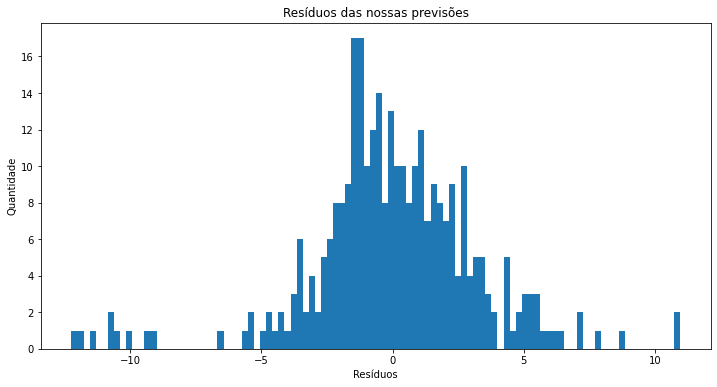

In [93]:
plt.figure(figsize=(12,6))
plt.hist(residuos_rf, bins=100)
plt.title('Resíduos das nossas previsões')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

*Aqui encontraremos o número de outliers*

In [109]:
# Aqui vamos considerar como outlier todos aqueles fora do intervalo de -5 a 5

outliers_rf = []

for valor in residuos_rf:
    if valor > 5 or valor < -5:
        outliers_rf.append(round(valor,3))
        
print(f'Usando o modelo Random Forest Regression, obtivemos {len(outliers_rf)} outliers.')

Usando o modelo Random Forest Regression, obtivemos 29 outliers.


## Conclusão do Modelo Random Forest Regression

Nesse modelo pudemos observar um erro quadrático médio de aproximadaemnte 3.2 pontos e 29 outliers. Com esse modelo chegamos em resultados melhores que os outros dois. Obtivemos tanto uma redução do erro quadrático médio como do número total de outliers. Apesar desse método não utilizar os coeficientes como os outros dois modelos (Lasso e Elastic NET), chegamos em um resultado melhor, nos levando a acreditar que o uso de múltiplas árvores de decisão (1000 árvores) possa gerar um modelo preditivo de maior qualidade.

## Conclusões

A partir do modelo utilizado, podemos tirar algumas conclusões do modelo:

* Dos modelos utilizados, o que apresentou o melhor desempenho foi o Random Forest Regression, com um RMSE de 3,2. 

* Como visto pela correlação, a feature Dalc (consumo de alccol diário) se relaciona de forma negativa com nosso target, ou seja, uma possível conclusão disso é que o consumo diário de álcool contribui negativamente com a nota dos alunos no ensino médio.  
  
* Em contrapartida, encontramos uma correlação positiva entre a feature Walc e nosso target. A feature Walc caracteriza o consumo de alcool nos finais de semana pelos alunos. Desse modo, podemos interpretar que esse consumo nos finais de semana, indica um consumo de alcool em contextos sociais, e não como um vício (consumo diário). Assim podemos tirar uma possível conclusão de que alunos que possuem maior convívio social conseguem melhores notas. Vale ressaltar que aqui não estamos dizendo que apenas os alunos que bebem aos finais de semana possuem uma vida social mais agitada, mas sim que, quando o consumo de alcool está ligado aos finais de semana, há uma tendência dele ser devido ao convívio social.  
  
* Nosso modelo teve uma boa margem, vizualizada pelo nosso gráfico, onde podemos ver que a maioria do erros orbita ao redos do ponto x = 0, de modo que nosso resíduos se mostram baixos

## Bibliografia

* Disponível em: https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58. Acesso em: 21 nov. 2020.

* Disponível em: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0. Acesso em: 20 nov. 2020.

* Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html. Acesso em: 19 nov. 2020.

* Disponível em: https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f. Acesso em: 23 nov. 2020.

* Disponível em: https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a. Acesso em: 24 nov. 2020.

* Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. Acesso em: 23 nov. 2020.

* Disponível em: https://scikit-learn.org/stable/modules/tree.html. Acesso em: 21 nov. 2020.

https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a
